In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.metrics import SCORERS
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [5]:
# Target Label
df['SalePrice']

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

In [6]:
df.shape

(1168, 81)

 - 1168 rows x 81 cols

In [7]:
df.size

94608

 - size of df

In [8]:
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF   

 - We can see that there are many null values in the df. We will need to treat this later

In [9]:
# Unique values in all columns
for column in df.columns:
        print(str(column)+" : " +str(df[column].unique()))

Id : [127 889 793 ... 196  31 617]
MSSubClass : [120  20  60  50  70  30 160  85  45  90  40  80 190  75 180]
MSZoning : ['RL' 'RM' 'FV' 'RH' 'C (all)']
LotFrontage : [ nan  95.  92. 105.  58.  88.  70.  80.  50.  44. 129.  59.  55.  64.
  24.  68.  71.  74.  61.  60. 120.  84. 141.  30.  65.  76. 100.  85.
  75. 107. 122.  82.  62.  73.  79.  77.  41.  69.  90.  96.  72.  34.
  78.  63.  40.  98. 160. 108. 128.  51.  81.  99.  66.  37. 174.  87.
  53. 152.  47.  86.  56.  89.  35.  52.  21. 104.  57.  83.  46. 101.
 112. 149.  93.  49.  43. 130.  54.  91.  67.  97. 110. 103. 115.  94.
  48.  36. 313. 109. 144. 121. 102. 116. 182.  32.  42. 168. 118.  38.
 140. 134. 114. 124.  39. 111.  45. 106. 153.]
LotArea : [  4928  15865   9920  11751  16635  14054  11341  13125   9170   8480
   8600   9548   9196   8892  16466  10592   5890   7314   7917   2016
  12435   8445   9717  10659   9230  21000  25339  11394   6380  11988
   7658   3378  18890  12358  14762  10356  10400  12615   7540   

In [10]:
# Unique values in all columns
for column in df.columns:
    print(df[column].value_counts())

127     1
1391    1
1389    1
448     1
1179    1
       ..
1402    1
661     1
101     1
415     1
617     1
Name: Id, Length: 1168, dtype: int64
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
65.0      35
85.0      26
90.0      20
78.0      19
73.0      16
24.0      16
68.0      16
79.0      14
21.0      14
64.0      14
51.0      13
72.0      13
55.0      13
100.0     12
59.0      12
82.0      12
63.0      11
71.0      11
74.0      11
53.0      10
69.0      10
66.0      10
88.0      10
84.0       9
34.0       9
67.0       9
77.0       8
40.0       8
52.0       8
43.0       8
76.0       8
92.0       8
57.0       7
86.0       7
35.0       7
95.0       7
62.0       7
61.0   

In [11]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
len(df.Id.unique())

1168

In [13]:
# Since we dont need an identifier, we will be dropping it
df.drop(columns=['Id'],inplace=True)

In [14]:
# New columns in df
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          77 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [16]:
# We can see that some features have very less values. Thease features are too less to even be sampled so we will be dropping those.
df.drop(columns=['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'LotFrontage', 'FireplaceQu'],inplace=True)

In [17]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [18]:
df.shape

(1168, 74)

 - We have now dropped most features that could not be treated. This is because treating them would have resulted in a bias
 - We will treat the nnull values of remaining features after encoding them. But before doing this, let us explore the current df a bit further.

<br>
<b> We will now see the distribution of features in regards to the target label 

<AxesSubplot:xlabel='MSSubClass'>

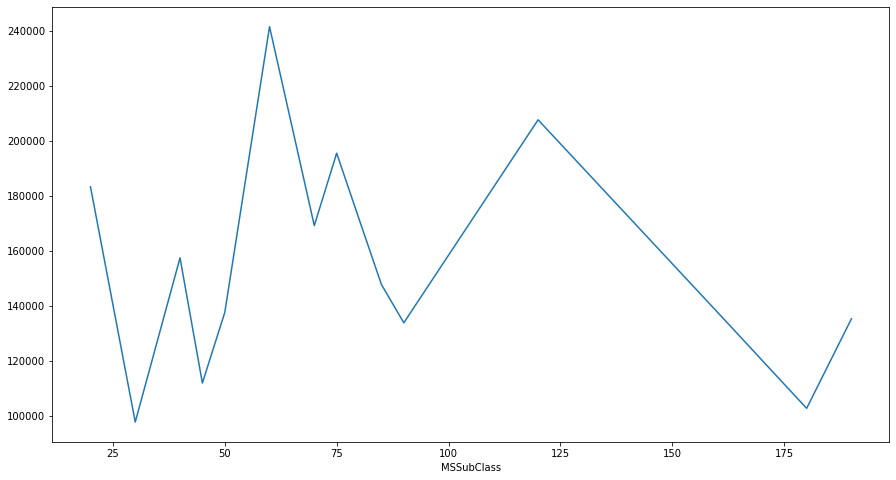

In [19]:
# Distribution of MSSubClass vs SalePrice
D=df.groupby('MSSubClass').mean()
plt.figure(figsize=(15,8))
D['SalePrice'].plot()

<AxesSubplot:xlabel='MSZoning'>

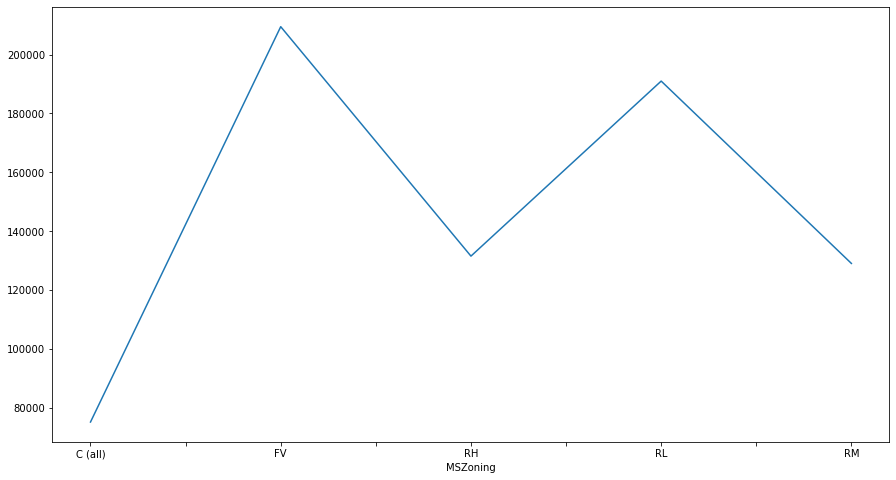

In [20]:
# Distribution of MSZoning vs SalePrice
D=df.groupby('MSZoning').mean()
plt.figure(figsize=(15,8))
D['SalePrice'].plot()

<AxesSubplot:xlabel='HouseStyle'>

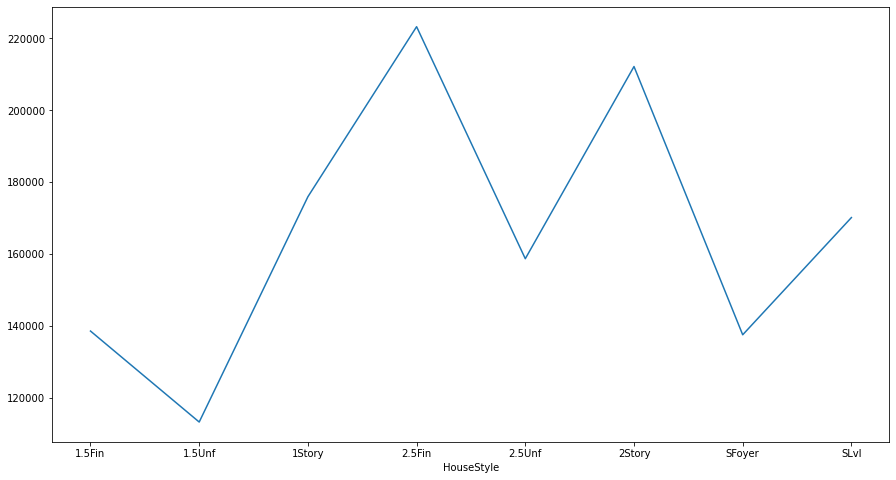

In [21]:
# Distribution of HouseStyle vs SalePrice
D=df.groupby('HouseStyle').mean()
plt.figure(figsize=(15,8))
D['SalePrice'].plot()

<AxesSubplot:xlabel='GarageType'>

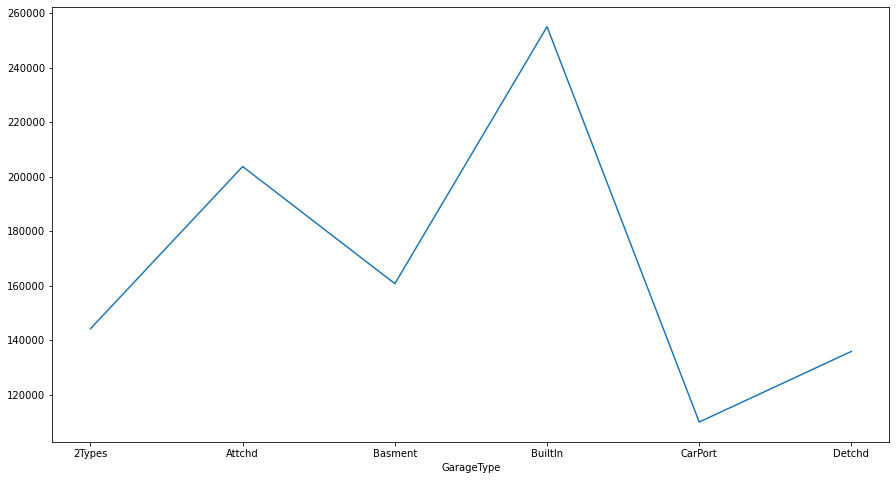

In [22]:
# Distribution of GarageType vs SalePrice
D=df.groupby('GarageType').mean()
plt.figure(figsize=(15,8))
D['SalePrice'].plot()

<AxesSubplot:xlabel='YrSold'>

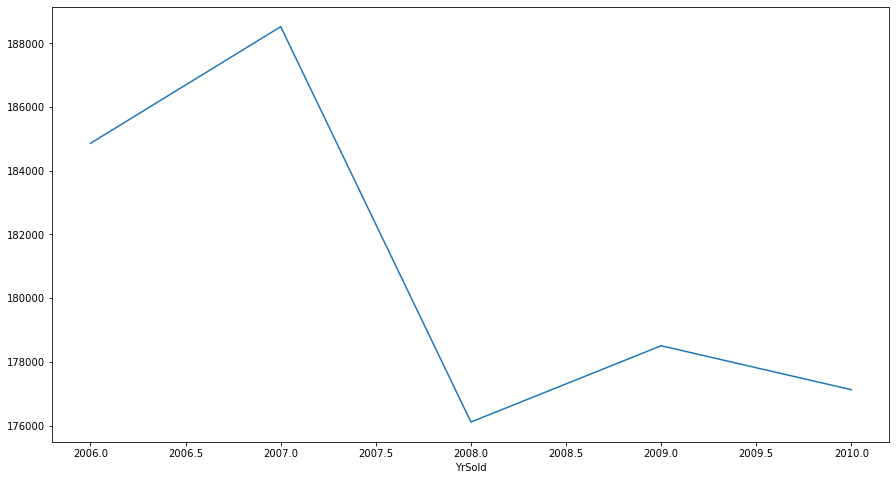

In [23]:
# Distribution of YrSold vs SalePrice
D=df.groupby('YrSold').mean()
plt.figure(figsize=(15,8))
D['SalePrice'].plot()

<AxesSubplot:xlabel='BldgType'>

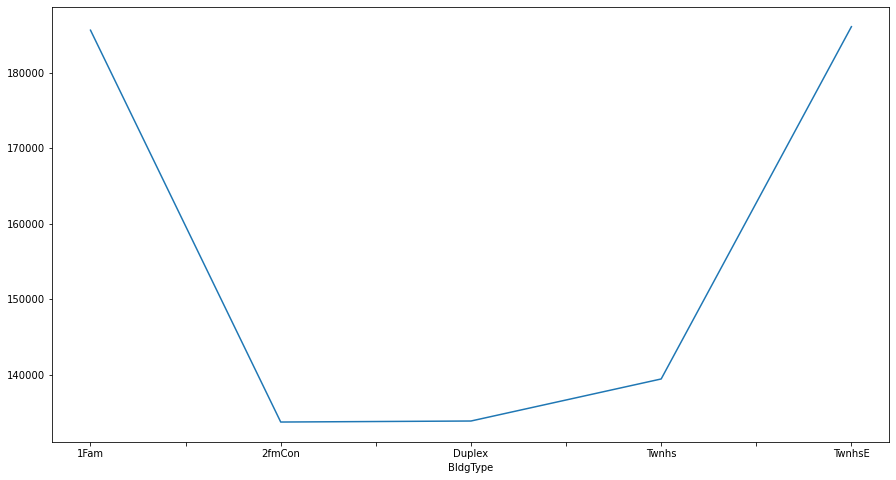

In [24]:
# Distribution of BldgType vs SalePrice
D=df.groupby('BldgType').mean()
plt.figure(figsize=(15,8))
D['SalePrice'].plot()

We can see how the target behaves according to different feature values.
We see how the price has increased over the years and trends and necessities valued by the customers
This can help in building statistics on how the different trends can be accomodated to provide the best saleprice

In [25]:
# We are dropping Utilities because it has only one feature value accross all entries.
df.drop(columns=['Utilities'],inplace=True)

In [26]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
   

In [27]:
len(df.columns)

73

 - Now lets start treating the null values

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotArea        1168 non-null   int64  
 3   Street         1168 non-null   object 
 4   LotShape       1168 non-null   object 
 5   LandContour    1168 non-null   object 
 6   LotConfig      1168 non-null   object 
 7   LandSlope      1168 non-null   object 
 8   Neighborhood   1168 non-null   object 
 9   Condition1     1168 non-null   object 
 10  Condition2     1168 non-null   object 
 11  BldgType       1168 non-null   object 
 12  HouseStyle     1168 non-null   object 
 13  OverallQual    1168 non-null   int64  
 14  OverallCond    1168 non-null   int64  
 15  YearBuilt      1168 non-null   int64  
 16  YearRemodAdd   1168 non-null   int64  
 17  RoofStyle      1168 non-null   object 
 18  RoofMatl

In [29]:
df.isnull().any()

MSSubClass       False
MSZoning         False
LotArea          False
Street           False
LotShape         False
LandContour      False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBat

In [30]:
# Treating Null values
df['GarageQual'].fillna('TA', inplace=True)
df['GarageCond'].fillna('TA', inplace=True)
df['GarageType'].fillna('Attchd', inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean, inplace=True)
df['GarageFinish'].fillna('Unf', inplace=True)
df['BsmtFinType2'].fillna('Unf', inplace=True)
df['BsmtFinType1'].fillna('Unf', inplace=True)
df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean, inplace=True)
df['BsmtQual'].fillna('TA', inplace=True)
df['BsmtCond'].fillna('TA', inplace=True)
df['BsmtExposure'].fillna('No', inplace=True)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1168 non-null   int64 
 1   MSZoning       1168 non-null   object
 2   LotArea        1168 non-null   int64 
 3   Street         1168 non-null   object
 4   LotShape       1168 non-null   object
 5   LandContour    1168 non-null   object
 6   LotConfig      1168 non-null   object
 7   LandSlope      1168 non-null   object
 8   Neighborhood   1168 non-null   object
 9   Condition1     1168 non-null   object
 10  Condition2     1168 non-null   object
 11  BldgType       1168 non-null   object
 12  HouseStyle     1168 non-null   object
 13  OverallQual    1168 non-null   int64 
 14  OverallCond    1168 non-null   int64 
 15  YearBuilt      1168 non-null   int64 
 16  YearRemodAdd   1168 non-null   int64 
 17  RoofStyle      1168 non-null   object
 18  RoofMatl       1168 non-null

In [32]:
df.isnull().any() == False

MSSubClass       True
MSZoning         True
LotArea          True
Street           True
LotShape         True
LandContour      True
LotConfig        True
LandSlope        True
Neighborhood     True
Condition1       True
Condition2       True
BldgType         True
HouseStyle       True
OverallQual      True
OverallCond      True
YearBuilt        True
YearRemodAdd     True
RoofStyle        True
RoofMatl         True
Exterior1st      True
Exterior2nd      True
MasVnrType       True
MasVnrArea       True
ExterQual        True
ExterCond        True
Foundation       True
BsmtQual         True
BsmtCond         True
BsmtExposure     True
BsmtFinType1     True
BsmtFinSF1       True
BsmtFinType2     True
BsmtFinSF2       True
BsmtUnfSF        True
TotalBsmtSF      True
Heating          True
HeatingQC        True
CentralAir       True
Electrical       True
1stFlrSF         True
2ndFlrSF         True
LowQualFinSF     True
GrLivArea        True
BsmtFullBath     True
BsmtHalfBath     True
FullBath  

In [72]:
# <<<<<<<<<< Need to use encoder to encode non-numerical features to numerical features >>>>>>>>>>>>>
for col in df.columns:
    if df[col].dtypes=='object':
        encoder=LabelEncoder()
        df[col]=encoder.fit_transform(df[col])

In [73]:
df.describe()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.00000,1097.000000
mean,55.893345,3.013674,10646.870556,0.997265,1.907931,2.782133,2.989061,0.062899,12.258888,2.048314,2.007293,0.463993,3.082042,6.186873,5.612580,1972.362808,1985.305378,1.414768,1.088423,7.691887,9.390155,1.747493,53.938013,2.520510,2.861440,1.408387,2.259799,2.812215,2.259799,2.753874,453.556062,4.698268,49.063810,574.321787,1076.941659,1.030994,1.535096,0.948040,3.722881,1182.722881,355.966272,4.835916,1543.525068,0.428441,0.057429,1.577028,0.399271,2.882407,1.038286,2.320875,6.580675,5.753874,0.644485,2.302644,64.302644,1.194166,1.877849,504.112124,3.864175,3.899727,1.891522,99.246126,46.730173,22.016408,3.875114,16.025524,3.671832,49.602552,6.377393,2007.803099,7.451231,3.80948,185704.073838
std,40.679387,0.616674,9158.244654,0.052247,1.419912,0.696006,1.650002,0.281193,6.020379,0.888100,0.256203,1.185692,1.897611,1.347711,1.096755,29.398061,20.581569,0.840512,0.652356,3.004841,3.415964,0.625679,79.878453,0.699184,0.401797,0.705196,0.866529,0.655769,1.150594,1.831284,465.147870,0.948071,167.750743,451.063853,438.275236,0.288063,1.747495,0.222047,0.987031,389.707491,443.129281,43.348954,523.242227,0.514952,0.236655,0.548506,0.504649,0.777084,0.196669,0.830010,1.562304,0.952113,0.650203,1.795046,24.353830,0.810314,0.629007,186.552666,0.610703,0.518780,0.431526,127.435663,64.613281,62.457472,30.001063,56.699291,46.319502,560.221250,2.670083,1.328886,1.653254,1.05470,78338.276648
min,20.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.00000,35311.000000
25%,20.000000,3.000000,7795.000000,1.000000,0.000000,3.000000,1.000000,0.000000,7.000000,2.000000,2.000000,0.000000,2.000000,5.000000,5.000000,1955.000000,1967.000000,1.000000,1.000000,6.000000,7.000000,1.000000,0.000000,2.000000,3.000000,1.000

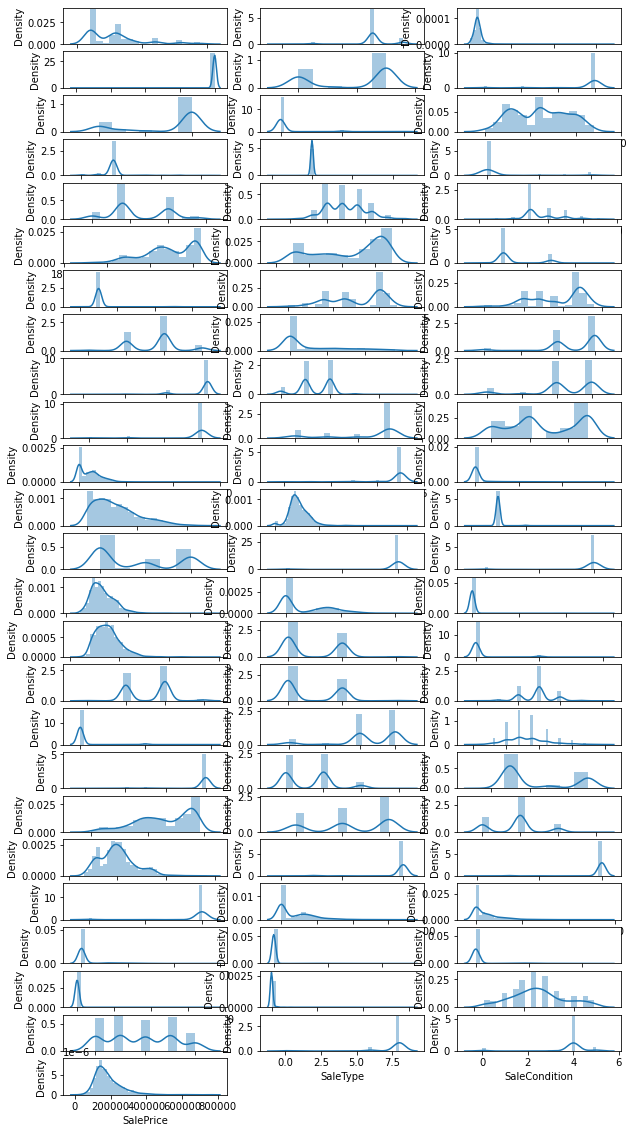

In [75]:
#Distribution of the df
plt.figure(figsize=(10,20),facecolor='white')
plotnumber=1
for i in df:
    if plotnumber<=75:
        ax=plt.subplot(25,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

In [55]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
   

In [66]:
dfl = []
index = []
for i in range(0,len(df['MasVnrArea'])):
    try:        
        dfl.append(int(df['MasVnrArea'][i]))
    except:
        index.append(i)
        pass

In [67]:
index

[67, 75, 96, 175, 213, 352, 826]

In [69]:
df = df.drop(df.index[index])

In [70]:
df.shape

(1097, 73)

In [68]:
df['MasVnrArea'][60:80]

60                                                  0.0
61                                                  0.0
62                                                340.0
63                                                  0.0
64                                                216.0
65                                                  0.0
66                                                  0.0
67    <bound method NDFrame._add_numeric_operations....
68                                                220.0
69                                                  0.0
70                                                140.0
71                                                183.0
72                                                336.0
73                                                  0.0
74                                                  0.0
75    <bound method NDFrame._add_numeric_operations....
76                                                  0.0
77                                              

In [71]:
df = df.reset_index(drop=True)

 - The code had some noise with method values being present among objects...this was used to clean the df and then was proceeded by encoding

In [76]:
df.shape

(1097, 73)

In [77]:
df.size

80081

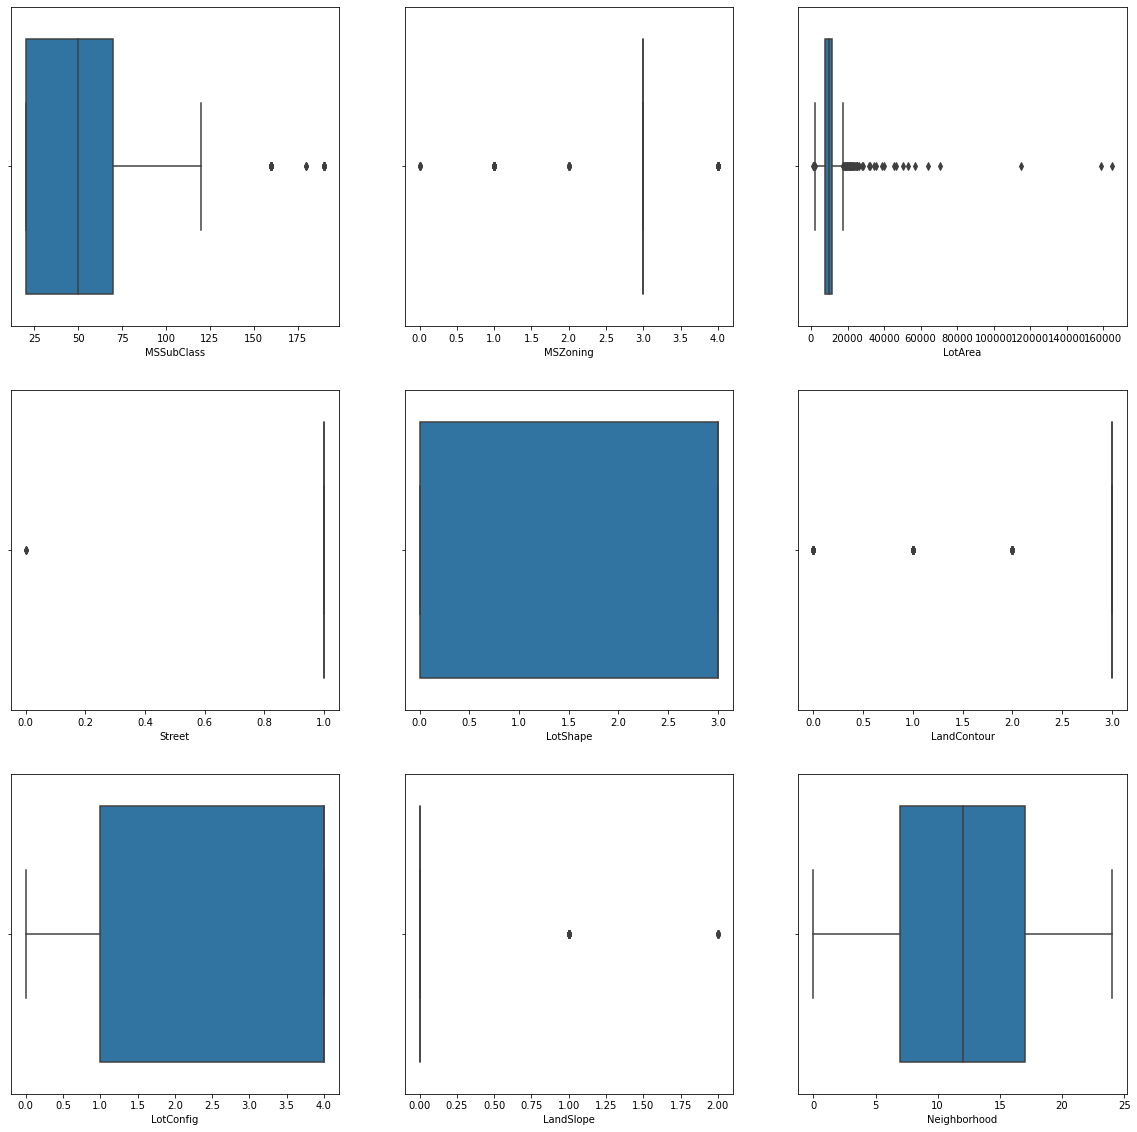

In [78]:
# Detecting Outliers
plt.figure(figsize=(20,20))
plotnumber=1
for i in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

In [79]:
#Removing outliers using zscore
z=np.abs(stats.zscore(df))
np.where(z>3)

(array([   1,    1,    1, ..., 1095, 1095, 1095], dtype=int64),
 array([ 7, 18, 32, ..., 37, 59, 60], dtype=int64))

In [80]:
df.shape

(1097, 73)

In [81]:
# Dropping rows where z>3
index=(np.where(z>3)[0])
df=df.drop(df.index[index])

In [82]:
df.shape

(472, 73)

In [84]:
# Skew values before treatment
df.skew()

MSSubClass        1.166070
MSZoning          2.542611
LotArea           0.797740
Street            0.000000
LotShape         -0.312087
LandContour      -4.836857
LotConfig        -1.033430
LandSlope         0.000000
Neighborhood      0.153402
Condition1       -1.384406
Condition2        0.000000
BldgType          2.256769
HouseStyle        0.338270
OverallQual      -0.094341
OverallCond       1.256553
YearBuilt        -0.941256
YearRemodAdd     -0.877113
RoofStyle         1.579841
RoofMatl          0.000000
Exterior1st      -0.659419
Exterior2nd      -0.707699
MasVnrType        0.381358
MasVnrArea        1.055024
ExterQual        -0.042518
ExterCond        -3.093443
Foundation       -0.653298
BsmtQual         -1.280895
BsmtCond         -4.315288
BsmtExposure     -0.944084
BsmtFinType1      0.112095
BsmtFinSF1        0.433021
BsmtFinType2     -4.521348
BsmtFinSF2        5.230108
BsmtUnfSF         0.757982
TotalBsmtSF       0.095755
Heating           0.000000
HeatingQC         0.775881
C

In [86]:
# separating labels and data to predict SalePrice
x=df.drop(columns=['SalePrice'],axis=1)
y=df['SalePrice']

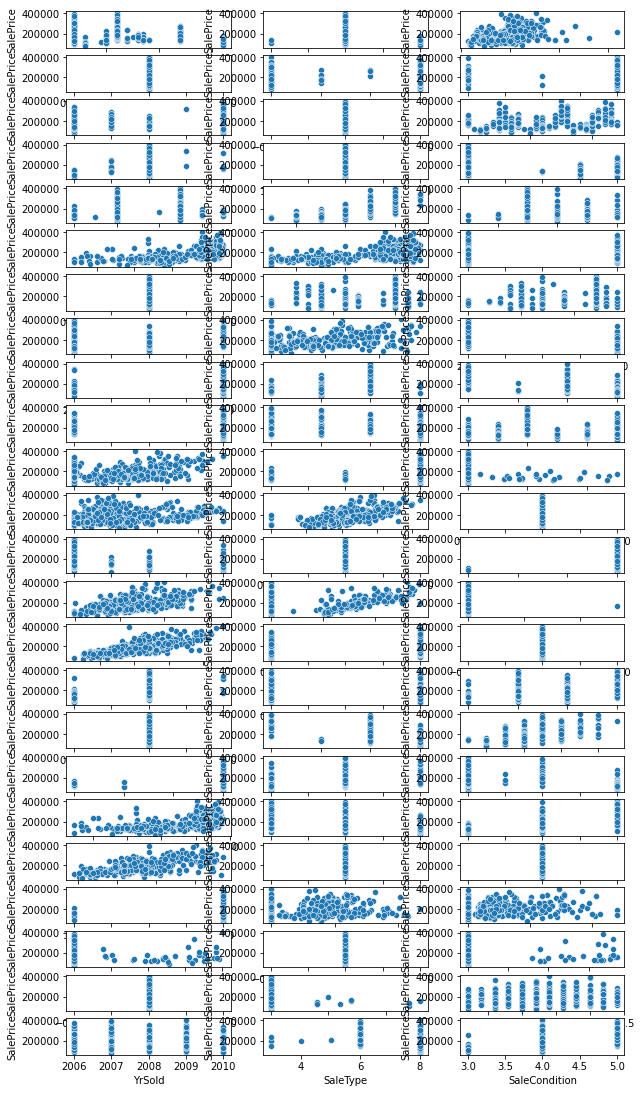

In [88]:
# Relation between features and labels using Scatter plot
plt.figure(figsize=(10,20),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=75:
        ax=plt.subplot(25,3,plotnumber)
        sns.scatterplot(x[column],y)
    plotnumber+=1

In [89]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_new = power.fit_transform(x)

In [90]:
# Skew values after treatment
data_new=pd.DataFrame(data_new,columns=x.columns)
data_new.skew()

MSSubClass        0.090625
MSZoning         -0.983925
LotArea           0.151999
Street            0.000000
LotShape         -0.318982
LandContour      -4.692966
LotConfig        -0.948935
LandSlope         0.000000
Neighborhood     -0.126801
Condition1        1.476044
Condition2        0.000000
BldgType          2.162364
HouseStyle       -0.043486
OverallQual      -0.044575
OverallCond      -0.205716
YearBuilt        -0.268508
YearRemodAdd     -0.538350
RoofStyle         1.579841
RoofMatl          0.000000
Exterior1st      -0.436709
Exterior2nd      -0.439917
MasVnrType        0.018497
MasVnrArea        0.112867
ExterQual        -0.042518
ExterCond        -3.093443
Foundation       -0.184500
BsmtQual         -0.184466
BsmtCond         -4.315288
BsmtExposure     -0.806887
BsmtFinType1     -0.143859
BsmtFinSF1       -0.490210
BsmtFinType2     -4.004721
BsmtFinSF2        4.004721
BsmtUnfSF        -0.178939
TotalBsmtSF      -0.034750
Heating           0.000000
HeatingQC         0.466285
C

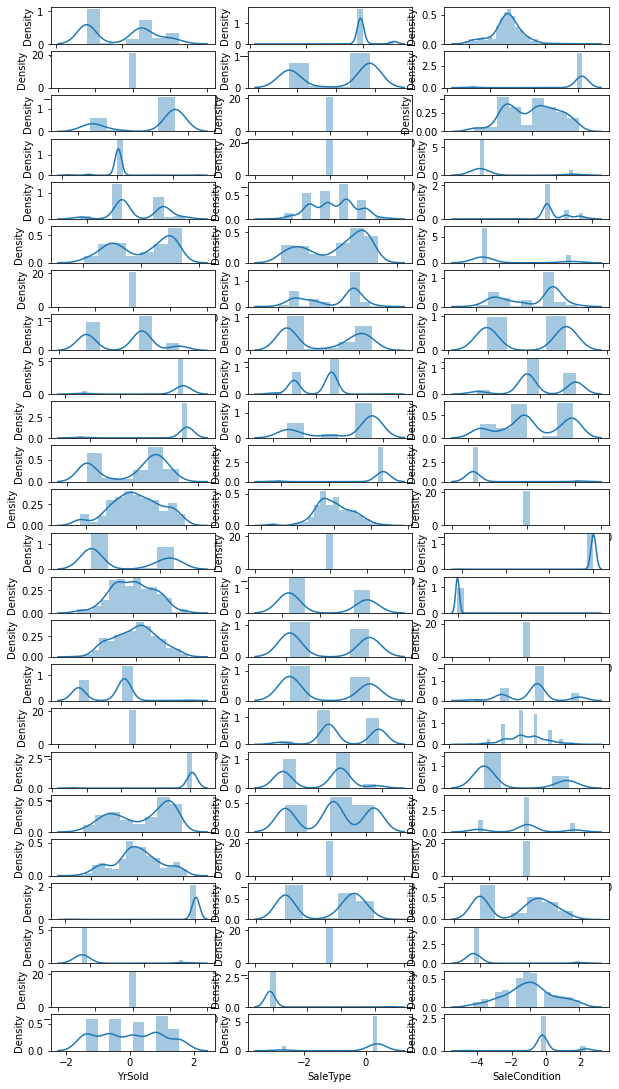

In [92]:
# Distibution after fixing skew and outliers
plt.figure(figsize=(10,20),facecolor='white')
plotnumber=1
for i in data_new:
    if plotnumber<=75:
        ax=plt.subplot(25,3,plotnumber)
        sns.distplot(data_new[i])
        plt.xlabel(i)
    plotnumber+=1

In [93]:
x = data_new

## Model

In [96]:
# Finding best random state
min_squared_error = 0
max_random_state = 1
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    model=ElasticNet()
    model.fit(X_train,y_train)
    pred= model.predict(X_test)
    root_mean_squared_error=np.sqrt(mean_squared_error(y_test,pred))
    if root_mean_squared_error<min_squared_error:
        min_squared_error=root_mean_squared_error
        max_random_state=i
        
print('lowest error is: ',min_squared_error,' on random_state ',max_random_state)

lowest error is:  0  on random_state  1


In [98]:
# List of regressors and scorers

en = ElasticNet()
lr = LogisticRegression(random_state = 1)
dtr = DecisionTreeRegressor(random_state=1)
rfr = RandomForestRegressor(random_state=1)
ar = AdaBoostRegressor(random_state=1)
gbr= GradientBoostingRegressor(random_state=1)
sr = SVR()
lgr=LGBMRegressor(random_state=1)

m_list= [en,lr,dtr,rfr,ar,gbr,sr,lgr]

s=SCORERS
s.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [99]:
# Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [100]:
# Training models and getting CV score
for m in m_list:
    m.fit(X_train,y_train)
    preds = m.predict(X_test)
    rmse= np.sqrt(mean_squared_error(y_test,preds))
    print(m)
    print('Root_mean_squared_error: ',rmse)
    print('cross validation scores below:--  \n',m)
    print('root_mean_squared_error: ',cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('difference between model score and cross validation score: ',-rmse-cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('\n')
    print('\n')

ElasticNet()
Root_mean_squared_error:  17107.367097227998
cross validation scores below:--  
 ElasticNet()
root_mean_squared_error:  -22680.527700738494
difference between model score and cross validation score:  5573.160603510496




LogisticRegression(random_state=1)
Root_mean_squared_error:  37314.73007326567
cross validation scores below:--  
 LogisticRegression(random_state=1)
root_mean_squared_error:  -36915.59081660108
difference between model score and cross validation score:  -399.13925666459545




DecisionTreeRegressor(random_state=1)
Root_mean_squared_error:  32336.856200506
cross validation scores below:--  
 DecisionTreeRegressor(random_state=1)
root_mean_squared_error:  -38989.177699922286
difference between model score and cross validation score:  6652.3214994162845




RandomForestRegressor(random_state=1)
Root_mean_squared_error:  20157.69418330294
cross validation scores below:--  
 RandomForestRegressor(random_state=1)
root_mean_squared_error:  -21940.219267563276
d

## Hyper-Parameter Tuning (HPT)

In [105]:
# Parameter Grid
grid_param = {
    'penalty' : ['l1','l2','elasticnet','none'],
    'solver' : ['newton-cg','lbfgs','liblinear','sag','saga'],
    'max_iter':[int(x) for x in np.linspace(100, 1200, num = 12)],
    'multi_class':['auto','ovr','multinomial']}

In [106]:
grid_search=RandomizedSearchCV(lr,param_distributions =grid_param,cv=5,n_iter = 10,n_jobs=15,verbose = 1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=1),
                   n_jobs=15,
                   param_distributions={'max_iter': [100, 200, 300, 400, 500,
                                                     600, 700, 800, 900, 1000,
                                                     1100, 1200],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   verbose=1)

In [107]:
# List of best parameters
grid_search.best_params_

{'solver': 'saga', 'penalty': 'l1', 'multi_class': 'auto', 'max_iter': 600}

In [109]:
# Fitting model with best params
m = LogisticRegression(random_state=1,solver= 'saga', penalty= 'l1', multi_class= 'auto', max_iter= 600)
m.fit(X_train,y_train)
preds = m.predict(X_test)
rmse= np.sqrt(mean_squared_error(y_test,preds))
print(m)
print('Root_mean_squared_error: ',rmse)
print('cross validation scores below:--  \n',m)
print('root_mean_squared_error: ',cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())
print('difference between model score and cross validation score: ',-rmse-cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())

LogisticRegression(max_iter=600, penalty='l1', random_state=1, solver='saga')
Root_mean_squared_error:  50863.19633952315
cross validation scores below:--  
 LogisticRegression(max_iter=600, penalty='l1', random_state=1, solver='saga')
root_mean_squared_error:  -46624.94720719614
difference between model score and cross validation score:  -4238.249132327008


## Model Saving

In [110]:
import joblib

joblib.dump(m,'LRegressor_best.obj')

['LRegressor_best.obj']